<img src="https://i.ibb.co/qN0Y0zN/portada.png" alt="portada" border="0">

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tocheading">Tabla de contenido</h1>
<div id="toc"></div>

![title](https://1000marcas.net/wp-content/uploads/2020/01/logo-MINI.png)

# Analisis de Agencia de Mini-coopers

## Hoja de detalle de participación
<img src="https://i.ibb.co/x2stxBh/Imagen4.png" alt="Imagen4" border="0"></a>


## Descripción del caso

La Compañía MINI COOPERS automóviles tiene agencias distribuidas en México en donde venden los modelos de automóviles. sobre los estados que cuyo objetivo es analizar los automoviles por cliente, fecha, precio de venta y precio de lista. Todo este comportamiento aplica en las ciudades donde se encuentra localizadas de los diferentes estados de la República Mexicana. Las agencias sucursales que corresponde a este análisis es Monterrey (Nuevo León, Reforma (CDMX), Las Lomas(CDMX) y Zapopan(Estado de México) con los modelos disponibles en México.

## Objetivo de análisis
Qué dudas de negocios se pretenden resolver
Este caso se requiere de un analista que pueda manipular los datos capturados y tener en cuenta los siguientes puntos:
* ¿Cuál es la ciudad donde se vende más automóviles Mini-Coopers?
* ¿Cuál es la ciudad donde se vende menos automóviles Mini-Coopers?
* ¿En qué periodo del mes reciben más compras?
* ¿Cuál es modelo de automóvil que se vende más en México?
* ¿Cuál es modelo de automóvil que se vende menos en México?
## Tipos y semántica
<img src="https://i.ibb.co/jDTw63c/hols.png" alt="hols" border="0">

# Observaciones

## Imports

In [2]:
# Se importan las librerías básicas para el trabajo de analítica de datos

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Para que nuestros gráficos se integren a Jupyter Notebook
%matplotlib inline


## Cargar datos

In [3]:
# Cargar los datos de un archivo, y ponerlos en una variable de tipo dataframe de pandas

df = pd.read_csv("VentasMINI_FULL_Inicio.csv")

# La variable df representa al conjunto de datos completo.

## Datos ausentes
En este análisis no se muestra ningun dato ausente debido a que todos sus campos estan registrados.

# Análisis Intercuartílico

## Análisis de caso atípicos:

In [27]:
# Determinación de rango no atípico
promedio_precioVenta = df['edad'].mean()
print(df['edad'].median())
desviacion_estandar = df['edad'].std()
minimo_no_atipico = promedio_precioVenta-(1.5*desviacion_estandar)
maximo_no_atipico = promedio_precioVenta+(1.5*desviacion_estandar)

print("Mínimo no atípico:", minimo_no_atipico)
print("Máximo no atípico:", maximo_no_atipico)

print("\n")
# Eliminar observaciones con valores atípicos
df[(df['edad']>minimo_no_atipico) & (df['edad']<maximo_no_atipico)].info()

25.0
Mínimo no atípico: 10.30682631810209
Máximo no atípico: 51.39317368189791


<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 199
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   agencia       179 non-null    object 
 1   modelo        179 non-null    object 
 2   transmisión   179 non-null    object 
 3   precio_lista  179 non-null    int64  
 4   precio_venta  179 non-null    float64
 5   año           179 non-null    int64  
 6   mes           179 non-null    object 
 7   año_mes       179 non-null    object 
 8   sexo          179 non-null    object 
 9   edad          179 non-null    int64  
 10  descuento     179 non-null    float64
dtypes: float64(2), int64(3), object(6)
memory usage: 16.8+ KB


## Representación de Edad
Gráfica sin valores atípicos de la columna ```edad```

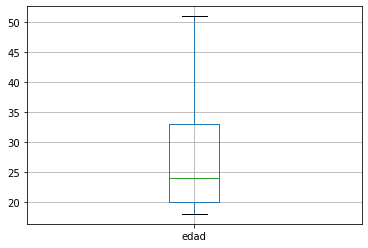

In [5]:
boxplot = df[(df['edad']>minimo_no_atipico) & (df['edad']<maximo_no_atipico)].boxplot(column=['edad'])

**NOTA:** Aunque tengamos valores atípcos no consideramos que debemos eliminarlos debido a que Sí lo hacemos no podriamos hacer un análisis completo de los datos proporcionados por la empresa.

# Volumetría

In [6]:
volumen=df.shape
cantidad_total=len(df)
print(f"\t\tDataFrame\nReglones:{volumen[0]}\nColumnas:{volumen[1]}\n\t\tVolumetria de datos: {cantidad_total}")

		DataFrame
Reglones:200
Columnas:13
		Volumetria de datos: 200


## Tipo de datos

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_factura    200 non-null    object 
 1   agencia       200 non-null    object 
 2   modelo        200 non-null    object 
 3   transmisión   200 non-null    object 
 4   fecha_venta   200 non-null    object 
 5   precio_lista  200 non-null    int64  
 6   precio_venta  200 non-null    float64
 7   año           200 non-null    int64  
 8   mes           200 non-null    object 
 9   año_mes       200 non-null    object 
 10  sexo          200 non-null    object 
 11  edad          200 non-null    int64  
 12  descuento     200 non-null    float64
dtypes: float64(2), int64(3), object(8)
memory usage: 20.4+ KB


## Eliminar datos no utilizados
El motivo de eliminar estas variables:
* ```fecha_venta ```: Esta columna no es relevante para el análisis, ya que contamos con las columnas de ```mes``` y ``` año_mes``` que corresponde a ser mas factible en manejar estas columnas
* ```id_factura ```: Esta columna no es relevante por que no es necesario conocer el código de facutra sobre la compra. Es decir esta columna no diria nada en cuestion de columnas bivariadas o campos relacionados.

In [8]:
# Fecha_venta
del df['fecha_venta']
del df["id_factura"]

In [9]:
#Cambiamos los terminos originales en los valores de modelo por el que deberia de ser. Por ejemplo "MINI Cooper All Black(AUT)"
#Cambiamos por el valor "MINI Cooper All Black" por que el termino no tiene nada que ver ya que tenemos el campo Transmisión.

for valor in df['modelo'].tolist():
    tamaño=0
    tamaño=len(valor)
    if valor[tamaño-5:]=='(AUT)':
        df= df.replace([valor],valor[:tamaño-5])

# Analisis de Frecuencias Univariadas

## Frecuencias Relativas y absolutas

## Supuesto
Numero de operaciones con Frecuencias relativas

In [10]:
#Agencia


def Generar_acomulativas(opcion):

    df_frecuencias=df.pivot_table(index=opcion,values='precio_venta',aggfunc="count",margins=True, margins_name='All')
    df_frecuencias=df_frecuencias.rename(columns={'precio_venta':'fi'})
    df_frecuencias["hi"]=(df_frecuencias['fi'].values)/len(df)
    lista=[]
    sumador=0
    for valor in df_frecuencias['fi'].values:
        sumador=sumador+valor
        lista.append(sumador)
    df_frecuencias["FI"]=lista

    lista=[]
    sumador=0
    for valor in df_frecuencias["hi"].values:
        sumador=sumador+valor
        lista.append(sumador)
    df_frecuencias["HI"]=lista
    print("*"*30)
    print(df_frecuencias)
    print("\n\n")
    return df_frecuencias


print("\t\tNumero de operaciones de [agencia]")
Generar_acomulativas("agencia")
print("\t\tNumero de operaciones de [modelo]")
Generar_acomulativas("modelo")
print("\t\tNumero de operaciones de [año]")
Generar_acomulativas("año")
print("\t\tNumero de operaciones de [año_mes]")
Generar_acomulativas("año_mes")
print("\t\tNumero de operaciones  [sexo]")
Generar_acomulativas("sexo")
print("\t\tNumero de operaciones de [transmision]")
result_transmision=Generar_acomulativas("transmisión")


		Numero de operaciones de [agencia]
******************************
            fi     hi   FI     HI
agencia                          
LAS LOMAS   56  0.280   56  0.280
MONTERREY   43  0.215   99  0.495
REFORMA     39  0.195  138  0.690
ZAPOPAN     62  0.310  200  1.000
All        200  1.000  400  2.000



		Numero de operaciones de [modelo]
******************************
                            fi     hi   FI     HI
modelo                                           
MINI Cooper All Black       38  0.190   38  0.190
MINI Cooper Bakerstreet     15  0.075   53  0.265
MINI Cooper Bayswater       19  0.095   72  0.360
MINI Cooper Chili           15  0.075   87  0.435
MINI Cooper Classic         35  0.175  122  0.610
MINI Cooper Green Park      13  0.065  135  0.675
MINI Cooper Hyde Park       10  0.050  145  0.725
MINI Cooper Oxford Street   17  0.085  162  0.810
MINI Cooper Pepper          19  0.095  181  0.905
MINI Cooper Salt            19  0.095  200  1.000
All                     

**Notas:**
* La agencia que vendio más automoviles fue ZAPOPAN.
* El modelo *MINI Cooper All Black* obtuvo mejores resultados en ventas.
* El modelo *MINI Cooper HYDE PARK* obtuvo los peores resultados en ventas.
* En el 2012 se vendio más automoviles.
* En el mes de febrero del 2011 obtuvo resultados de ventas insatisfactorios como de los peores resultados de la época. Paralelo a esto en diciembre del 2012 obtuvo el mejor resultado sobre ventas.
* Las mujeres prefieren comprar la Marca Mini Cooper que los hombres.
* Los clientes no les importa sobre que tipo de transmisión prefieren conducir.

## Supuesto
**Agencia**
* sumatoria
* Promedio
* Mínimos y Máximos
* Desviación estandar

In [11]:
#sumatoria, Promedio, Minimos o Maximos

result_modelo=df.pivot_table(index='modelo',values='precio_venta',aggfunc="sum",margins=True, margins_name='All')
result_agencia=df.pivot_table(index='agencia',values='precio_venta',aggfunc="sum",margins=True, margins_name='All')
result_anio=df.pivot_table(index='año',values='precio_venta',aggfunc="sum",margins=True, margins_name='All')
result_anio_mes=df.pivot_table(index='año_mes',values='precio_venta',aggfunc="sum",margins=False, margins_name='All')
result_transmision=df.pivot_table(index='transmisión',values='precio_venta',aggfunc="sum",margins=True, margins_name='All')



#Para mostrar sum,mean,min o max necesitamos cambiar aggfunc="descripcion"
result_agencia_sum=df.pivot_table(index='agencia',values='precio_venta',aggfunc="sum")
result_agencia_max=df.pivot_table(index='agencia',values='precio_venta',aggfunc="max")
result_agencia_min=df.pivot_table(index='agencia',values='precio_venta',aggfunc="min")
result_agencia_mean=df.pivot_table(index='agencia',values='precio_venta',aggfunc="mean")
result_agencia_std=df.pivot_table(index='agencia',values='precio_venta',aggfunc="std")

#mostrar tabla
print("\t\t\t DESCRIPCION de las Agencias")
print("\tLa descripción sobre el precio de venta de cada sucursal con su respectivo enfoque:\n")
print("->Sumatoria de todos los precios de venta en Agencia\n")
print(result_agencia_sum)
print("\n->La agencia con el precio mayor que fue adquirido por un cliente es la sucursal ZAPOPAN")
print(result_agencia_max)
print("\n->La agencia con el precio menor que fue adquirido por un cliente son las sucursales LAS LOMAS Y REFORMA")
print(result_agencia_min)
print("\n->Promedio del precio de venta de cada Agencia")
print(result_agencia_mean)
print("\n->Desviación Estandar del precio por Agencia")
print(result_agencia_std)

			 DESCRIPCION de las Agencias
	La descripción sobre el precio de venta de cada sucursal con su respectivo enfoque:

->Sumatoria de todos los precios de venta en Agencia

           precio_venta
agencia                
LAS LOMAS   18120651.68
MONTERREY   13766046.06
REFORMA     12104383.60
ZAPOPAN     19982968.50

->La agencia con el precio mayor que fue adquirido por un cliente es la sucursal ZAPOPAN
           precio_venta
agencia                
LAS LOMAS      387360.0
MONTERREY      371995.0
REFORMA        358900.0
ZAPOPAN        387360.0

->La agencia con el precio menor que fue adquirido por un cliente son las sucursales LAS LOMAS Y REFORMA
           precio_venta
agencia                
LAS LOMAS      248577.0
MONTERREY      261660.0
REFORMA        248577.0
ZAPOPAN        261660.0

->Promedio del precio de venta de cada Agencia
            precio_venta
agencia                 
LAS LOMAS  323583.065714
MONTERREY  320140.606047
REFORMA    310368.810256
ZAPOPAN    322305.943548

-

# Análisis frecuencias bivariadas

## Valores cruzadas

In [12]:
#filtro=(df["agencia"]=="MONTERREY") & (df["modelo"]=="MINI Cooper All Black")
#df1=df[filtro]
#df1.info
#df1['precio_venta

#agencia y modelo.
result_modeloAgencia=df.pivot_table(index='modelo',columns='agencia',values='precio_venta',aggfunc="sum",margins=True, margins_name='All')
#agencia y año-mes.
result_anioMesAgencia=df.pivot_table(index='año_mes',columns='agencia',values='precio_venta',aggfunc="count",margins=True, margins_name='All')
#agencia y año.
result_anioAgencia=df.pivot_table(index='año',columns='agencia',values='precio_venta',aggfunc="sum",margins=True, margins_name='All')
#agencia y transmisión.
result_transmisionAgencia=df.pivot_table(index='transmisión',columns='agencia',values='precio_venta',aggfunc="sum",margins=True, margins_name='All')
#modelo y año.
result_anioModelo=df.pivot_table(index='modelo',columns='año',values='precio_venta',aggfunc="sum",margins=True, margins_name='All')
#modelo y año-mes.
result_anioMesModelo=df.pivot_table(index='modelo',columns='año_mes',values='precio_venta',aggfunc="sum",margins=True, margins_name='All')


#Para mostrar sum,mean,min o max necesitamos cambiar aggfunc="descripcion"
result_anioAgencia=df.pivot_table(index='año',columns='agencia',values='precio_venta',aggfunc="count",margins=True, margins_name='All')
result_modeloAgencia=df.pivot_table(index='modelo',columns='agencia',values='precio_venta',aggfunc="count",margins=True, margins_name='All')


## Supuestos
* ¿Cuántos coches de cada modelo vendió cada agencia?
* ¿Cuántas operaciones realizó cada agencia, en cada año?

In [13]:
#resultado.fillna(0)/len(df) CAMBIAR NaN A 0
def Generar_frecuenciasfi(resultado):
    return print(resultado.fillna(0))
    

#Agencia y modelo.
print("\n")
print("\t\t\t¿Cuántos coches de cada modelo vendió cada agencia? \n")
print("AGENCIA MODELO (fi)")
result_modeloAgencia=df.pivot_table(index='modelo',columns='agencia',values='precio_venta',aggfunc="count",margins=True, margins_name='All')
Generar_frecuenciasfi(result_modeloAgencia)
print("\n")
#Agencia y año
print("\t\t\t¿Cuántas operaciones realizó cada agencia, en cada año?\n")
print("AGENCIA AÑO (fi)")
Generar_frecuenciasfi(result_anioAgencia)




			¿Cuántos coches de cada modelo vendió cada agencia? 

AGENCIA MODELO (fi)
agencia                    LAS LOMAS  MONTERREY  REFORMA  ZAPOPAN  All
modelo                                                                
MINI Cooper All Black           13.0        5.0      9.0     11.0   38
MINI Cooper Bakerstreet          5.0        2.0      6.0      2.0   15
MINI Cooper Bayswater            6.0        2.0      4.0      7.0   19
MINI Cooper Chili                5.0        5.0      0.0      5.0   15
MINI Cooper Classic             12.0        7.0      8.0      8.0   35
MINI Cooper Green Park           3.0        4.0      2.0      4.0   13
MINI Cooper Hyde Park            1.0        0.0      0.0      9.0   10
MINI Cooper Oxford Street        1.0       10.0      1.0      5.0   17
MINI Cooper Pepper               6.0        5.0      5.0      3.0   19
MINI Cooper Salt                 4.0        3.0      4.0      8.0   19
All                             56.0       43.0     39.0     62.0  20

In [14]:
#Para mostrar sum,mean,min o max necesitamos cambiar aggfunc="descripcion"
print("\n")
print("El monto que vendio la agencia por año es la siguiente:\n")
print("*ZAPOPAN obtuvo el monto mayor de vender mas automoviles en todos los años")
print("*Reforma obtuvo el monto menor de vender menos automoviles en todos los años")

result_anioAgencia=df.pivot_table(index='agencia',columns='año',values='precio_venta',aggfunc="sum",margins=True, margins_name='All')
result_anioAgencia
#print("\n")
#result_modeloAgencia=df.pivot_table(index='modelo',columns='agencia',values='precio_venta',aggfunc="count",margins=True, margins_name='All')



El monto que vendio la agencia por año es la siguiente:

*ZAPOPAN obtuvo el monto mayor de vender mas automoviles en todos los años
*Reforma obtuvo el monto menor de vender menos automoviles en todos los años


año,2011,2012,All
agencia,,,
LAS LOMAS,5668923.68,12451728.0,18120651.68
MONTERREY,5701196.06,8064850.0,13766046.06
REFORMA,4260177.60,7844206.0,12104383.60
ZAPOPAN,7254670.50,12728298.0,19982968.50
All,22884967.84,41089082.0,63974049.84


In [15]:
result_modeloAgencia=df.pivot_table(index='modelo',columns='agencia',values='precio_venta',aggfunc="mean",margins=True, margins_name='All')
print("Los precios promedio de cada modelo por Agencias son: ")
result_modeloAgencia.fillna(0)

Los precios promedio de cada modelo por Agencias son: 


agencia,LAS LOMAS,MONTERREY,REFORMA,ZAPOPAN,All
modelo,,,,,
MINI Cooper All Black,323791.623077,321565.700000,318275.244444,323302.429091,322050.618947
MINI Cooper Bakerstreet,332662.360000,320146.200000,341082.293333,320146.200000,332692.690667
MINI Cooper Bayswater,322763.793333,325061.550000,315458.550000,331925.885714,324843.224211
MINI Cooper Chili,327696.800000,338692.736000,0.000000,324655.952000,330348.496000
MINI Cooper Classic,293894.250000,286092.542857,269361.500000,282331.912500,284083.602857
MINI Cooper Green Park,337644.586667,334667.520000,310365.000000,311932.500000,324620.295385
MINI Cooper Hyde Park,332384.000000,0.000000,0.000000,347529.437778,346014.894000
MINI Cooper Oxford Street,387360.000000,324757.620000,295850.000000,357818.180000,336463.358824
MINI Cooper Pepper,343195.526667,325533.260000,309520.424000,356352.426667,331763.097895


# Análisis de Tendencia


## Supuesto 
* Cómo fluctuaron las ventas en cuanto al monto en el año.<br>
* Variable de valor: Precio de venta
* Variable ordinal en Y: Año-Mes.<br>
* Se genera una tabla de valores con estas dos variables.<br>

## Gráfica

Text(0, 0.5, 'Precio venta (Millones)')

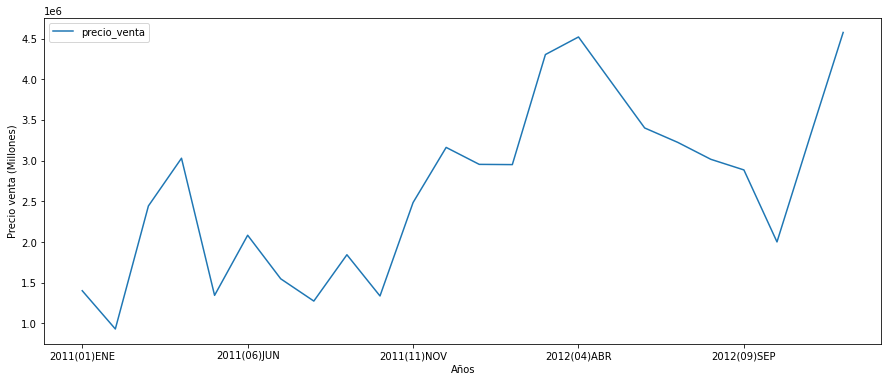

In [16]:
#Grafica
ax_tendencia=(result_anio_mes).plot()
fig = ax_tendencia.get_figure()
fig.set_size_inches(15, 6)
ax_tendencia.set_xlabel("Años")
ax_tendencia.set_ylabel("Precio venta (Millones)")



## Tabla de tendencia

In [17]:
result_anio_mes

,precio_venta
año_mes,
2011(01)ENE,1401506.82
2011(02)FEB,931664.44
2011(03)MAR,2443260.54
2011(04)ABR,3029561.22
2011(05)MAY,1344849.10
2011(06)JUN,2083333.00
2011(07)JUL,1547943.32
2011(08)AGO,1274511.56
2011(09)SEP,1843649.50


### Nota
* El precio de venta alcanzó su punto mínimo en febrero del 2011.
* El precio de venta alcanzó su punto máximo en diciembre del 2012.

#  Análisis de correlación
* Análisis en ```edad``` y ```precio_venta```
* Análisis en ```edad``` y ```descuento```

In [18]:
print("El analisis de correlación de edad y precio_venta es:",df['edad'].corr(df['precio_venta'], method="pearson"))
print("Quiere decir que no tiene correlación ")
print("No tiene que ver la edad con el precio de venta")

El analisis de correlación de edad y precio_venta es: -0.009549789689181394
Quiere decir que no tiene correlación 
No tiene que ver la edad con el precio de venta


In [19]:
print("El analisis de correlación de edad y descuento es:",df['edad'].corr(df['descuento'], method="pearson"))
print("Quiere decir que tiene una correlación muy débil ")
print("No tiene que ver la edad con el precio de venta")

El analisis de correlación de edad y descuento es: -0.10544688142622474
Quiere decir que tiene una correlación muy débil 
No tiene que ver la edad con el precio de venta


**Nota:** Entre nuestas variables no existen ninguna correlación una con otra.


# Gráficas

## Proporciones

		Cantidad porcentual de cantidad de coches vendidos por agencia



<AxesSubplot:ylabel='agencia'>

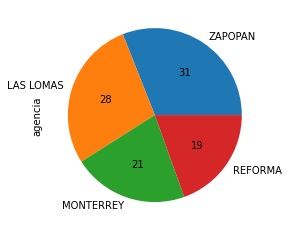

In [20]:
print("\t\tCantidad porcentual de cantidad de coches vendidos por agencia\n")
df['agencia'].value_counts().plot(kind="pie",autopct="%d")

#result_agencia/result_agencia.sum()*2

		Cantidad porcentual de cantidad de coches vendidos por Año

	**En el 2012 se vendio casi el doble de coches que en el 2011**


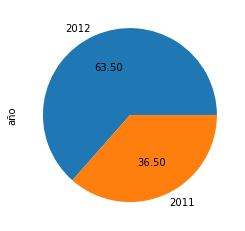

In [21]:
print("\t\tCantidad porcentual de cantidad de coches vendidos por Año\n")
df['año'].value_counts().plot(kind="pie",autopct="%.2f")

print("\t**En el 2012 se vendio casi el doble de coches que en el 2011**")


		Cantidad porcentual de cantidad de coches vendidos por tipo de transmisión

**Los clientes no tienen una preferencia notable entre elegir el tipo de transmisión en los coches**


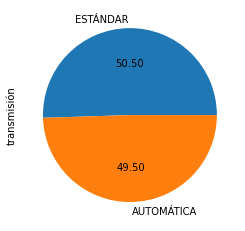

In [22]:
print("\t\tCantidad porcentual de cantidad de coches vendidos por tipo de transmisión\n")
df['transmisión'].value_counts().plot(kind="pie",autopct="%.2f")
print("**Los clientes no tienen una preferencia notable entre elegir el tipo de transmisión en los coches**")

## Comparativo



		Las Ventas de agencia sobre el Género dominante en comprar un coche Mini Cooper
	*Las mujeres predominan en elegír un autómovil de esta marca*


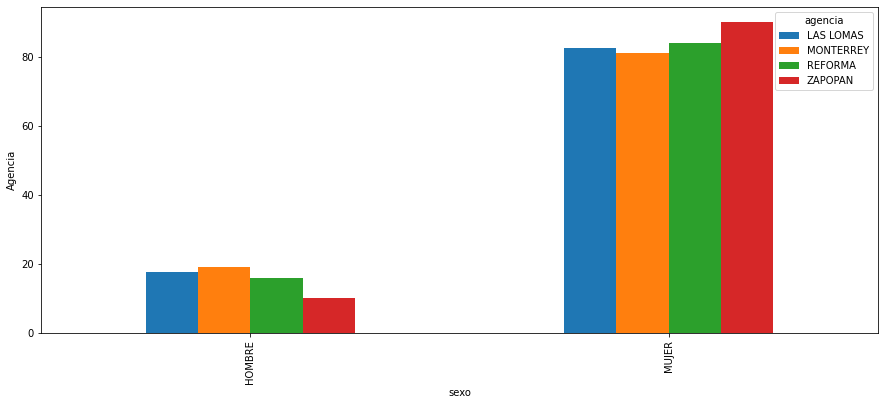

In [23]:
result_anioAgencia=df.pivot_table(index='sexo',columns='agencia',values='precio_venta',aggfunc="sum",margins=False, margins_name='All')

result_anioAgenciaPLOT=(result_anioAgencia)/result_anioAgencia.sum()*100

ax = result_anioAgenciaPLOT.plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(15, 6)
ax.set_xlabel("sexo")
ax.set_ylabel("Agencia")

print("\n\n\t\tLas Ventas de agencia sobre el Género dominante en comprar un coche Mini Cooper")
print("\t*Las mujeres predominan en elegír un autómovil de esta marca*")
plt.show()



		Ventas de modelos por años


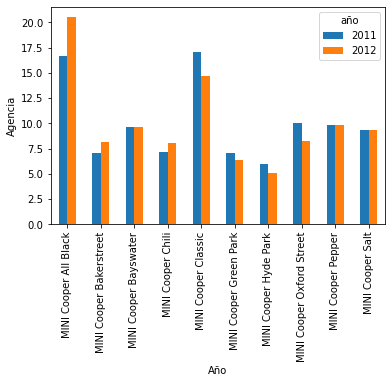

In [24]:
#modelo y año.
result_anioModelo=df.pivot_table(index='modelo',columns='año',values='precio_venta',aggfunc="sum",margins=False, margins_name='All')
result_anioModeloPLOT=((result_anioModelo)/(result_anioModelo.sum())*100)

ax = result_anioModeloPLOT.plot(kind="bar")
ax.plot(kind="bar")
fig1 = ax.get_figure()
fig.set_size_inches(20,4)
ax.set_xlabel("Año")
ax.set_ylabel("Agencia")

print("\n\n\t\tVentas de modelos por años")
plt.show()

**Notas:** 
* El módelo con mayor venta del 2011 es MINI Cooper Classic.
* El módelo con mayor venta del 2012 es MINI Cooper All Black.<br>
Resumiendo confirmando que el modelo con mayor ventas es _MINI Cooper All Black_